# Sarter Notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Reading Data

In [2]:
# read train data
df_data = pd.read_csv("Datasets.csv", sep=",")
df_data.head()
df_data.isnull().sum()

order_id                    0
origin_port                 0
3pl                         0
customs_procedures          0
logistic_hub             1049
customer                    0
product_id                  0
units                       0
late_order                  0
weight                    118
material_handling         118
origin_port_coord       50098
logistic_hub_coord      50098
dist_origin_hub         50098
customer_coord           2531
dist_hub_customer        2531
dist_origin_customer    38202
dtype: int64

# Clean the data

In [3]:
df_data["origin_port"] = df_data["origin_port"].replace(["ATHENAS"], "Athens")
df_data["origin_port"] = df_data["origin_port"].replace(["BCN"], "Barcelona")
df_data["late_order"] = df_data["late_order"].astype(int)

# Analaize the data

In [111]:
counts0 = df_data["order_id"].groupby(df_data["customs_procedures"]).count()
print(counts0.sort_values(ascending=False))

customs_procedures
CRF    51477
DTD    43484
DTP    19315
Name: order_id, dtype: int64


In [88]:
counts1 = df_data["late_order"].groupby(df_data["3pl"]).value_counts()
# For every 3pl, print the percentage of late orders
print(counts1)
for i in range(1, 5):
    print(f"v_00{i}", ":", counts1[f"v_00{i}"][0]/(counts1[f"v_00{i}"][0]+counts1[f"v_00{i}"][1]))

3pl    late_order
v_001  0              4929
       1              3048
v_002  0             43980
       1             10957
v_003  0              5198
       1              1735
v_004  0             33013
       1             11416
Name: late_order, dtype: int64
v_001 : 0.6179014667168108
v_002 : 0.8005533611227406
v_003 : 0.7497475840184624
v_004 : 0.7430507101217673


In [112]:
counts2 = df_data["late_order"].groupby(df_data["customs_procedures"]).value_counts()
print(counts2)
# For every custom_procedures, print the percentage of late orders
for name in ["CRF", "DTD", "DTP"]:
   print(name, ":", counts2[name][0]/(counts2[name][0]+counts2[name][1]))

customs_procedures  late_order
CRF                 0             41274
                    1             10203
DTD                 0             32548
                    1             10936
DTP                 0             13298
                    1              6017
Name: late_order, dtype: int64
CRF : 0.801794976397226
DTD : 0.7485051973139546
DTP : 0.6884804556044525


In [7]:
counts3 = df_data["customs_procedures"].groupby(df_data["3pl"]).value_counts()
print(counts3)

3pl    customs_procedures
v_001  CRF                    3686
       DTD                    2960
       DTP                    1331
v_002  CRF                   24595
       DTD                   21035
       DTP                    9307
v_003  CRF                    3103
       DTD                    2658
       DTP                    1172
v_004  CRF                   20093
       DTD                   16831
       DTP                    7505
Name: customs_procedures, dtype: int64


# ML

### Split the data

In [18]:
import sklearn as sk

### Decision trees

In [94]:
X = df_data.drop(['order_id', 'product_id',"weight", "logistic_hub", "customer", 'dist_origin_hub',
                  "origin_port_coord", "logistic_hub_coord", "customer_coord", "dist_hub_customer", 
                  "dist_origin_customer", 'material_handling'], axis=1).dropna()
print(X.head())
y = X['late_order']
X = X.drop(['late_order'], axis=1)


X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2)
X_train_enc = pd.get_dummies(X_train, columns=["origin_port", "3pl", "customs_procedures"])
X_test_enc = pd.get_dummies(X_test, columns=["origin_port", "3pl", "customs_procedures"])
print(X_train_enc.iloc(0)[7])

  origin_port    3pl customs_procedures  units  late_order
0   Rotterdam  v_002                DTP    583           1
1   Rotterdam  v_004                CRF    459           0
2      Athens  v_002                CRF    464           1
3   Rotterdam  v_004                CRF    678           0
4   Barcelona  v_002                CRF    353           0
units                     493
origin_port_Athens          1
origin_port_Barcelona       0
origin_port_Rotterdam       0
3pl_v_001                   0
3pl_v_002                   0
3pl_v_003                   0
3pl_v_004                   1
customs_procedures_CRF      0
customs_procedures_DTD      0
customs_procedures_DTP      1
Name: 24139, dtype: int64


In [95]:
from sklearn.tree import DecisionTreeClassifier
xval = [i for i in range(2, 18)]
yval = [None for _ in range(2, 18)]
for i in range(2, 18):
    modelt = DecisionTreeClassifier(criterion="entropy", max_depth=i)
    modelt.fit(X_train_enc, y_train)
    y_pred = modelt.predict(X_test_enc)
    yval[i-2] = sk.metrics.accuracy_score(y_pred, y_test)


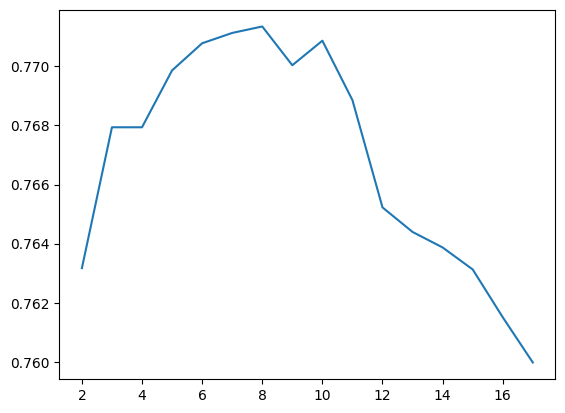

In [96]:
plt.plot(xval,yval)

In [97]:
print(max(yval))

0.7713510675533777


In [98]:
from sklearn.tree import plot_tree
modeltdef = DecisionTreeClassifier(criterion="entropy", max_depth=8)
modeltdef.fit(X_train_enc, y_train)




DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [103]:

df_val = pd.read_csv("Altres/test.csv", delimiter=";")
df_val["origin_port"] = df_val["origin_port"].replace(["ATHENAS"], "Athens")
df_val["origin_port"] = df_val["origin_port"].replace(["BCN"], "Barcelona")
X = df_val.drop(['order_id', 'product_id', "logistic_hub", "customer", ], axis=1).dropna()



X_enc = pd.get_dummies(X, columns=["origin_port", "3pl", "customs_procedures"])
print(X_enc)

y_def = modeltdef.predict(X_enc)


           order_id origin_port    3pl customs_procedures logistic_hub  \
0      0e364fa5c795   Rotterdam  v_002                CRF       Warsaw   
1      3ef49bd5a55b   Barcelona  v_002                CRF        Venlo   
2      9ab5b9685bd5   Rotterdam  v_004                DTD   Bratislava   
3      bfce5b4fc4fa   Rotterdam  v_002                DTD         Rome   
4      d94453ec8ec5   Barcelona  v_001                CRF   Bratislava   
...             ...         ...    ...                ...          ...   
28558  d268acf6459e      Athens  v_004                CRF   Dusseldorf   
28559  1aefc30b0eb3   Rotterdam  v_004                DTD      Hamburg   
28560  646a2e50e170   Rotterdam  v_001                CRF        Venlo   
28561  bf5177549be9     ATHENAS  v_001                CRF        Lille   
28562  525dafc0ad62   Rotterdam  v_004                CRF         Rome   

         customer  product_id  units  
0          Munich     1687644    477  
1          Berlin     1699689    

In [102]:
submission = pd.DataFrame({"order_id": df_val.order_id, "late_order": y_def})
submission.to_csv("submission_kaggle.csv", index=False)